## **Cat-Predictor**

**Purpose**: *With the help of Artificial Neyron Networks, we'll build a model which can predict a photo is cat or not.*

**Model**: *We'll use model `resnet34` which is trained by `1.3 mln `pictures.*

**Dataset**: *Oxford-IIIT Pet Dataset (consists of 7349 photos of cats and dogs)*




In [1]:
#Libraries
from fastai.vision.all import *
from ipywidgets import widgets

#Data
path = untar_data(URLs.PETS)/'images'

#Labeling function
def is_cat(x): return x[0].isupper()

#DataLoaders
dls = ImageDataLoaders.from_name_func(
    path, get_image_files(path), valid=0.2, seed=42,
    label_func=is_cat, item_tfms = Resize(224)
)


#Training
learn = cnn_learner(dls, resnet34, metrics = accuracy)
learn.fine_tune(2)

/usr/local/lib/python3.10/dist-packages/fastai/vision/learner.py:301: UserWarning: `cnn_learner` has been renamed to `vision_learner` -- please update your code
  warn("`cnn_learner` has been renamed to `vision_learner` -- please update your code")


epoch,train_loss,valid_loss,accuracy,time
0,0.173338,0.028599,0.989851,00:54


epoch,train_loss,valid_loss,accuracy,time
0,0.061000,0.026350,0.990528,00:50
1,0.028790,0.005454,0.997970,00:50


# **Let's test the model by a random phoho**

In [2]:
# Widget to upload a picture
upload =widgets.FileUpload()
upload

FileUpload(value={}, description='Upload')

Is that cat?: True
Accuracy: 1.0


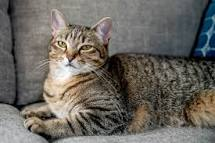

In [7]:
img = PILImage.create(upload.data[-1]) # image
pred , _ , prob = learn.predict(img) # predicting the image
print(f'Is that cat?: {pred}')
print(f'Accuracy: {prob[1]}')
img